In [1]:
# import needed libraries
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd


In [2]:
# create a function to scrape team performance for multiple years
def scrape_NBA_team_data(years = [2017, 2018]):
    
    final_df = pd.DataFrame(columns = ["Year", "Team", "W", "L",
                                       "W/L%", "GB", "PS/G", "PA/G",
                                       "SRS", "Playoffs",
                                       "Losing_season"])                            
    final_df2 = pd.DataFrame()
    
    # loop through each year
    for y in years:
        # NBA season to scrape
        year = y
        
        # URL to scrape, notice f string:
        url = f"https://www.basketball-reference.com/leagues/NBA_{year}_standings.html"
        url2 = f"https://www.basketball-reference.com/leagues/NBA_{year}_per_game.html"
        
        # collect HTML data
        html = urlopen(url)
        html2 = urlopen(url2)
        
        # create beautiful soup object from HTML
        soup = BeautifulSoup(html, features="lxml")
        soup2 = BeautifulSoup(html2, features="lxml")
        
        # use getText()to extract the headers into a list
        titles = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
        titles2 = [th.getText() for th in soup2.findAll('tr', limit=2)[0].findAll('th')]
        
        
        # first, find only column headers
        headers = titles[1:titles.index("SRS")+1]
        headers2 = titles2[1:titles2.index("Player")+1]
        
        
        # then, exclude first set of column headers (duplicated)
        titles = titles[titles.index("SRS")+1:]
        titles2 = titles2[titles2.index("Player")+1:]
        
        
        # next, row titles (ex: Boston Celtics, Toronto Raptors)
        try:
            row_titles = titles[0:titles.index("Eastern Conference")]
        except: row_titles = titles
        # remove the non-teams from this list
        for i in headers:
            row_titles.remove(i)
        row_titles.remove("Western Conference")
        divisions = ["Atlantic Division", "Central Division",
                     "Southeast Division", "Northwest Division",
                     "Pacific Division", "Southwest Division",
                     "Midwest Division"]
        for d in divisions:
            try:
                row_titles.remove(d)
            except:
                print("no division:", d)
        
        # next, grab all data from rows (avoid first row)
        rows = soup.findAll('tr')[1:]
        rows2 = soup2.findAll('tr')[1:]

        team_stats = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))]
        player_stats = [[td.getText() for td in rows2[i].findAll('td')] for i in range(len(rows2))]
        # remove empty elements
        team_stats = [e for e in team_stats if e != []]
        player_stats = [e for e in player_stats if e != []]
        # only keep needed rows
        team_stats = team_stats[0:len(row_titles)]
        
        # add team name to each row in team_stats
        for i in range(0, len(team_stats)):
            team_stats[i].insert(0, row_titles[i])
            team_stats[i].insert(0, year)
            
        # add team, year columns to headers
        headers.insert(0, "Team")
        headers.insert(0, "Year")

        final_header = headers2 + titles2
        
        # create a dataframe with all aquired info
        year_standings = pd.DataFrame(team_stats, columns = headers)
        playerstats = pd.DataFrame(player_stats, columns = final_header)
        
        # add a column to dataframe to indicate playoff appearance
        year_standings["Playoffs"] = ["Y" if "*" in ele else "N" for ele in year_standings["Team"]]
        # remove * from team names
        year_standings["Team"] = [ele.replace('*', '') for ele in year_standings["Team"]]
        # add losing season indicator (win % < .5)
        year_standings["Losing_season"] = ["Y" if float(ele) < .5 else "N" for ele in year_standings["W/L%"]]
        # add year for each player
        playerstats["Year"] = [year for n in playerstats['Player']]
        
        # append new dataframe to final_df
        final_df = final_df.append(year_standings)
        final_df2 = final_df2.append(playerstats)
        
    # export to csv
    final_df.to_csv("nba_team_data.csv", index=False)
    final_df2.to_csv("nba_player_data.csv", index=False)

In [3]:
scrape_NBA_team_data(years = [2010, 2011, 2012, 2013, 2014,
                              2015, 2016, 2017, 2018, 2019,
                              2020, 2021, 2022])



no division: Midwest Division


C:\Users\Minh\AppData\Local\Temp\ipykernel_23928\1115451407.py:97: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(year_standings)
C:\Users\Minh\AppData\Local\Temp\ipykernel_23928\1115451407.py:98: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df2 = final_df2.append(playerstats)


no division: Midwest Division


C:\Users\Minh\AppData\Local\Temp\ipykernel_23928\1115451407.py:97: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(year_standings)
C:\Users\Minh\AppData\Local\Temp\ipykernel_23928\1115451407.py:98: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df2 = final_df2.append(playerstats)


no division: Midwest Division


C:\Users\Minh\AppData\Local\Temp\ipykernel_23928\1115451407.py:97: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(year_standings)
C:\Users\Minh\AppData\Local\Temp\ipykernel_23928\1115451407.py:98: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df2 = final_df2.append(playerstats)


no division: Midwest Division


C:\Users\Minh\AppData\Local\Temp\ipykernel_23928\1115451407.py:97: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(year_standings)
C:\Users\Minh\AppData\Local\Temp\ipykernel_23928\1115451407.py:98: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df2 = final_df2.append(playerstats)


no division: Midwest Division


C:\Users\Minh\AppData\Local\Temp\ipykernel_23928\1115451407.py:97: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(year_standings)
C:\Users\Minh\AppData\Local\Temp\ipykernel_23928\1115451407.py:98: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df2 = final_df2.append(playerstats)


no division: Midwest Division


C:\Users\Minh\AppData\Local\Temp\ipykernel_23928\1115451407.py:97: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(year_standings)
C:\Users\Minh\AppData\Local\Temp\ipykernel_23928\1115451407.py:98: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df2 = final_df2.append(playerstats)


no division: Atlantic Division
no division: Central Division
no division: Southeast Division
no division: Northwest Division
no division: Pacific Division
no division: Southwest Division
no division: Midwest Division


C:\Users\Minh\AppData\Local\Temp\ipykernel_23928\1115451407.py:97: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(year_standings)
C:\Users\Minh\AppData\Local\Temp\ipykernel_23928\1115451407.py:98: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df2 = final_df2.append(playerstats)


no division: Atlantic Division
no division: Central Division
no division: Southeast Division
no division: Northwest Division
no division: Pacific Division
no division: Southwest Division
no division: Midwest Division


C:\Users\Minh\AppData\Local\Temp\ipykernel_23928\1115451407.py:97: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(year_standings)
C:\Users\Minh\AppData\Local\Temp\ipykernel_23928\1115451407.py:98: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df2 = final_df2.append(playerstats)


no division: Atlantic Division
no division: Central Division
no division: Southeast Division
no division: Northwest Division
no division: Pacific Division
no division: Southwest Division
no division: Midwest Division


C:\Users\Minh\AppData\Local\Temp\ipykernel_23928\1115451407.py:97: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(year_standings)
C:\Users\Minh\AppData\Local\Temp\ipykernel_23928\1115451407.py:98: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df2 = final_df2.append(playerstats)


no division: Atlantic Division
no division: Central Division
no division: Southeast Division
no division: Northwest Division
no division: Pacific Division
no division: Southwest Division
no division: Midwest Division


C:\Users\Minh\AppData\Local\Temp\ipykernel_23928\1115451407.py:97: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(year_standings)
C:\Users\Minh\AppData\Local\Temp\ipykernel_23928\1115451407.py:98: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df2 = final_df2.append(playerstats)


no division: Atlantic Division
no division: Central Division
no division: Southeast Division
no division: Northwest Division
no division: Pacific Division
no division: Southwest Division
no division: Midwest Division


C:\Users\Minh\AppData\Local\Temp\ipykernel_23928\1115451407.py:97: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(year_standings)
C:\Users\Minh\AppData\Local\Temp\ipykernel_23928\1115451407.py:98: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df2 = final_df2.append(playerstats)


no division: Atlantic Division
no division: Central Division
no division: Southeast Division
no division: Northwest Division
no division: Pacific Division
no division: Southwest Division
no division: Midwest Division


C:\Users\Minh\AppData\Local\Temp\ipykernel_23928\1115451407.py:97: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(year_standings)
C:\Users\Minh\AppData\Local\Temp\ipykernel_23928\1115451407.py:98: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df2 = final_df2.append(playerstats)


no division: Atlantic Division
no division: Central Division
no division: Southeast Division
no division: Northwest Division
no division: Pacific Division
no division: Southwest Division
no division: Midwest Division


C:\Users\Minh\AppData\Local\Temp\ipykernel_23928\1115451407.py:97: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(year_standings)
C:\Users\Minh\AppData\Local\Temp\ipykernel_23928\1115451407.py:98: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df2 = final_df2.append(playerstats)


In [4]:
df_team = pd.read_csv('nba_team_data.csv')
df_player = pd.read_csv('nba_player_data.csv')
df_team

,Year,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Playoffs,Losing_season
0,2010,Boston Celtics,50,32,0.610,—,99.2,95.6,3.37,Y,N
1,2010,Toronto Raptors,40,42,0.488,10.0,104.1,105.9,-1.83,N,Y
2,2010,New York Knicks,29,53,0.354,21.0,102.1,105.9,-4.01,N,Y
3,2010,Philadelphia 76ers,27,55,0.329,23.0,97.7,101.6,-3.93,N,Y
4,2010,New Jersey Nets,12,70,0.146,38.0,92.4,101.5,-8.93,N,Y
...,...,...,...,...,...,...,...,...,...,...,...
385,2022,Los Angeles Lakers,33,49,0.402,31.0,112.1,115.1,-3.08,N,Y
386,2022,Sacramento Kings,30,52,0.366,34.0,110.3,115.8,-5.26,N,Y
387,2022,Portland Trail Blazers,27,55,0.329,37.0,106.2,115.1,-8.55,N,Y
388,2022,Oklahoma City Thunder,24,58,0.293,40.0,103.7,111.8,-7.90,N,Y


In [5]:
years = df_team['Year'].unique()
years

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022], dtype=int64)

In [6]:
seasons = {}
seasons_conf = {}
for i in years:
    seasons["df_" + str(i)] = df_team.loc[df_team['Year'] == i]
    seasons_conf["df_"+ str(i)+"_East"] = seasons.get("df_"+str(i)).head(15)
    seasons_conf["df_"+ str(i)+"_West"] = seasons.get("df_"+str(i)).tail(15)
    
    #Creates csv
    seasons_conf["df_"+ str(i)+"_East"].to_csv("conference/east/df_"+ str(i)+"_East.csv", index=False)
    seasons_conf["df_"+ str(i)+"_West"].to_csv("conference/west/df_"+ str(i)+"_West.csv", index=False)
    
    
seasons_conf.get("df_2020_East").head(15)

,Year,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Playoffs,Losing_season
300,2020,Milwaukee Bucks,56,17,0.767,—,118.7,108.6,9.41,Y,N
301,2020,Toronto Raptors,53,19,0.736,2.5,112.8,106.5,5.97,Y,N
302,2020,Boston Celtics,48,24,0.667,7.5,113.7,107.3,5.83,Y,N
303,2020,Indiana Pacers,45,28,0.616,11.0,109.4,107.5,1.63,Y,N
304,2020,Miami Heat,44,29,0.603,12.0,112.0,109.1,2.59,Y,N
305,2020,Philadelphia 76ers,43,30,0.589,13.0,110.7,108.4,2.25,Y,N
306,2020,Brooklyn Nets,35,37,0.486,20.5,111.8,112.3,-1.01,Y,Y
307,2020,Orlando Magic,33,40,0.452,23.0,107.3,108.3,-0.93,Y,Y
308,2020,Charlotte Hornets,23,42,0.354,29.0,102.9,109.6,-7.03,N,Y
309,2020,Washington Wizards,25,47,0.347,30.5,114.4,119.1,-5.24,N,Y


In [7]:
years_p = df_player['Year'].unique()
years_p


array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022], dtype=int64)

In [8]:
seasons2 = {}
seasons2_players = {}
for j in years_p:
    seasons2["df_" + str(j)] = df_player.loc[df_player['Year'] == j]
    seasons2_players["df_"+ str(j)+"_player"] = seasons2.get("df_"+str(j))
    
    #Creates csv
    seasons2_players["df_"+ str(j)+"_player"].to_csv("players/df_"+ str(j)+"_player.csv", index=False)
    
seasons2_players.get("df_2020_player").head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
6134,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,0.592,...,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,2020
6135,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,0.557,...,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,2020
6136,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,0.493,...,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,2020
6137,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,0.500,...,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0,2020
6138,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,0.368,...,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7,2020
6139,Grayson Allen,SG,24,MEM,38,0,18.9,3.1,6.6,0.466,...,0.2,2.0,2.2,1.4,0.3,0.1,0.9,1.4,8.7,2020
6140,Jarrett Allen,C,21,BRK,70,64,26.5,4.3,6.6,0.649,...,3.1,6.5,9.6,1.6,0.6,1.3,1.1,2.3,11.1,2020
6141,Kadeem Allen,PG,27,NYK,10,0,11.7,1.9,4.4,0.432,...,0.2,0.7,0.9,2.1,0.5,0.2,0.8,0.7,5.0,2020
6142,Al-Farouq Aminu,PF,29,ORL,18,2,21.1,1.4,4.8,0.291,...,1.3,3.5,4.8,1.2,1.0,0.4,0.9,1.5,4.3,2020
6143,Justin Anderson,SG,26,BRK,10,1,10.7,1.0,3.8,0.263,...,0.1,2.0,2.1,0.8,0.0,0.6,0.4,1.3,2.8,2020


In [12]:
df = seasons2_players.get("df_2022_player")
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
7490,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,0.439,...,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,2022
7491,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,...,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,2022
7492,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,...,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,2022
7493,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,...,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,2022
7494,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.550,...,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8297,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,0.465,...,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,2022
8298,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,0.460,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2022
8299,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,0.526,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2022
8300,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,0.567,...,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2022


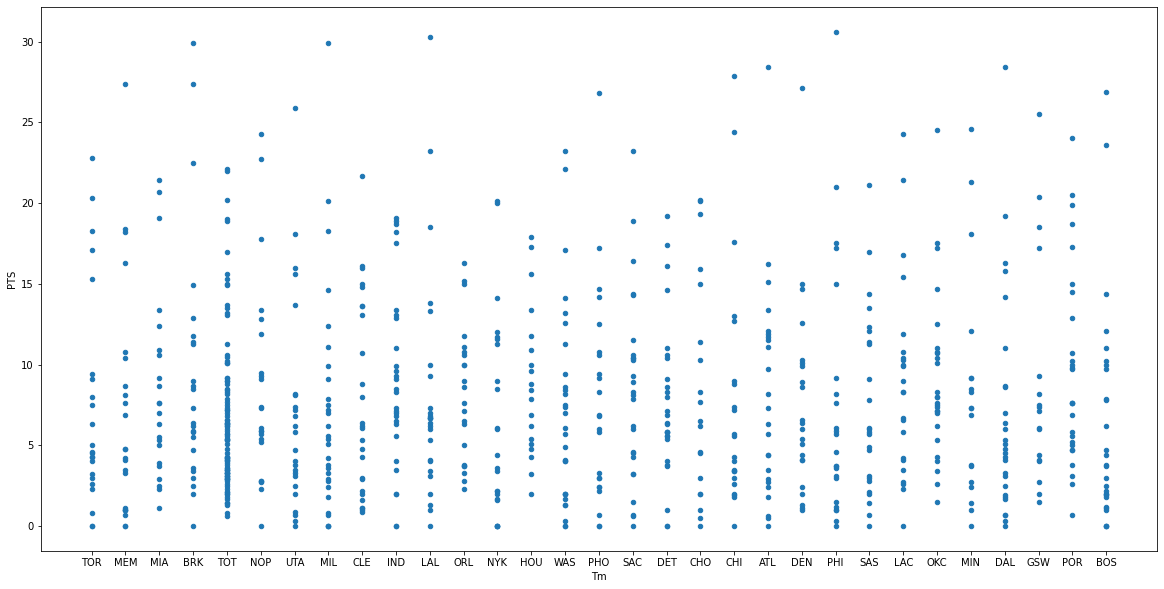

In [27]:
import matplotlib.pyplot as plt
df.plot(x = "Tm", y = "PTS", kind = "scatter", figsize=(20, 10))
plt.show()